Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from datetime import datetime

Data Cleaning

In [80]:
df = pd.read_csv("raw_data.csv")

In [82]:
df

,@timestamp,_id,_index,_score,fields.clientIP,fields.clientIP.keyword,fields.method,fields.method.keyword,fields.responseTime,fields.route,...,fields.server,fields.server.keyword,fields.statusCode,fields.timestamp,fields.userAgent,fields.userAgent.keyword,message,message.keyword,severity,severity.keyword
0,"Mar 31, 2025 @ 18:12:27.067",njo57JUBGhOokez5hTnb,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,1,/,...,server1,server1,200,"Mar 31, 2025 @ 18:12:27.067",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
1,"Mar 31, 2025 @ 18:12:26.848",nzo57JUBGhOokez5hTnb,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,0,/,...,server1,server1,200,"Mar 31, 2025 @ 18:12:26.848",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
2,"Mar 31, 2025 @ 18:12:26.631",oDo57JUBGhOokez5hTnb,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,1,/,...,server1,server1,200,"Mar 31, 2025 @ 18:12:26.631",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
3,"Mar 31, 2025 @ 18:12:26.413",oTo57JUBGhOokez5hTnb,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,1,/,...,server1,server1,200,"Mar 31, 2025 @ 18:12:26.413",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
4,"Mar 31, 2025 @ 18:12:26.196",ojo57JUBGhOokez5hTnb,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,0,/invalid-route,...,server1,server1,404,"Mar 31, 2025 @ 18:12:26.196",axios/1.8.4,axios/1.8.4,⚠️ Server1 API Error: GET /invalid-route,⚠️ Server1 API Error: GET /invalid-route,error,error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"Mar 31, 2025 @ 18:09:20.497",5jo27JUBGhOokez5sTij,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,2,/,...,server1,server1,200,"Mar 31, 2025 @ 18:09:20.497",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
196,"Mar 31, 2025 @ 18:09:20.279",5zo27JUBGhOokez5sTij,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,3,/,...,server1,server1,200,"Mar 31, 2025 @ 18:09:20.279",axios/1.8.4,axios/1.8.4,✅ Server1 API Call: GET /,✅ Server1 API Call: GET /,info,info
197,"Mar 31, 2025 @ 18:09:20.053",6Do27JUBGhOokez5sTij,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,57,/fail,...,server1,server1,500,"Mar 31, 2025 @ 18:09:20.053",axios/1.8.4,axios/1.8.4,⚠️ Server1 API Error: GET /fail,⚠️ Server1 API Error: GET /fail,error,error
198,"Mar 31, 2025 @ 18:09:19.766",6To27JUBGhOokez5sTij,app-logs-2025.03.31,-,::ffff:172.18.0.1,::ffff:172.18.0.1,GET,GET,119,/invalid-route,...,server1,server1,404,"Mar 31, 2025 @ 18:09:19.766",axios/1.8.4,axios/1.8.4,⚠️ Server1 API Error: GET /invalid-route,⚠️ Server1 API Error: GET /invalid-route,error,error


In [84]:
df.rename(columns={'fields.responseTime': 'response_time', 'fields.timestamp': 'timestamp'}, inplace=True)

In [86]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d, %Y @ %H:%M:%S.%f', errors='coerce')

In [88]:
# Drop unnecessary columns (keeping only useful ones)
df = df[['timestamp', 'response_time']]

In [90]:
df = df.sort_values(by="timestamp")

In [92]:
df

,timestamp,response_time
199,2025-03-31 18:09:19.404,208
198,2025-03-31 18:09:19.766,119
197,2025-03-31 18:09:20.053,57
196,2025-03-31 18:09:20.279,3
195,2025-03-31 18:09:20.497,2
...,...,...
4,2025-03-31 18:12:26.196,0
3,2025-03-31 18:12:26.413,1
2,2025-03-31 18:12:26.631,1
1,2025-03-31 18:12:26.848,0


EDA

In [95]:
print(df.describe())

                           timestamp  response_time
count                            200     200.000000
mean   2025-03-31 18:10:53.369110016       3.485000
min       2025-03-31 18:09:19.404000       0.000000
25%    2025-03-31 18:09:30.511500032       1.000000
50%    2025-03-31 18:10:53.356499968       1.000000
75%    2025-03-31 18:12:16.251500032       1.000000
max       2025-03-31 18:12:27.067000     208.000000
std                              NaN      17.642166


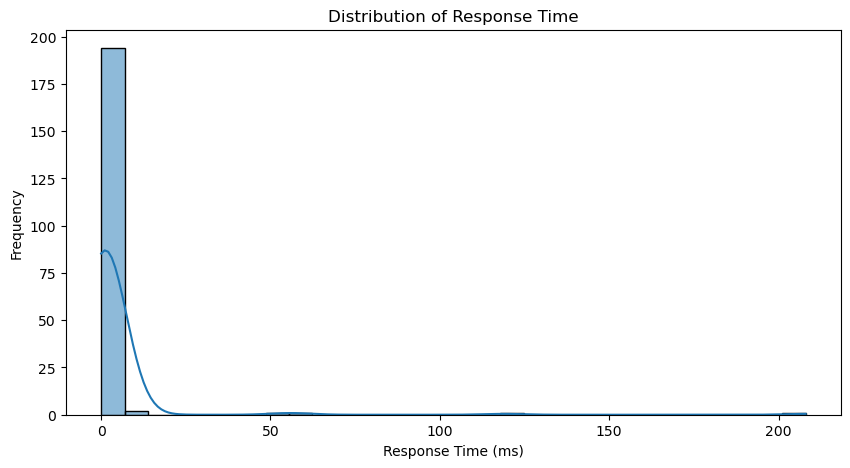

In [97]:
# Plot response time distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['response_time'], bins=30, kde=True)
plt.title("Distribution of Response Time")
plt.xlabel("Response Time (ms)")
plt.ylabel("Frequency")
plt.show()

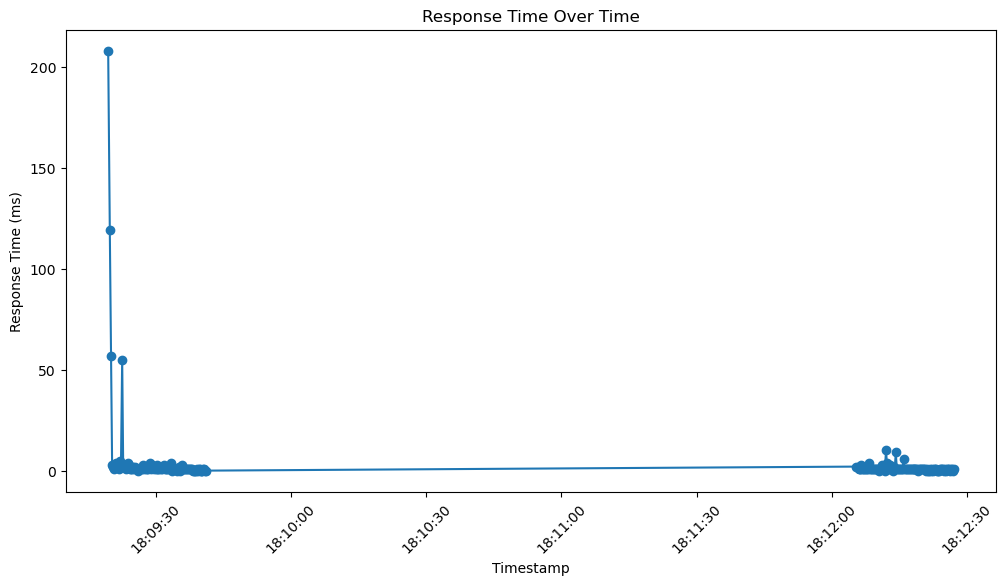

In [99]:
# Line plot to see trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['response_time'], marker='o', linestyle='-')
plt.title("Response Time Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Response Time (ms)")
plt.xticks(rotation=45)
plt.show()

Preprocessing

In [102]:
# Standardize response time for clustering
scaler = StandardScaler()
df['scaled_response_time'] = scaler.fit_transform(df[['response_time']])

DBSCAN

In [105]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df[['scaled_response_time']])

# DBSCAN detects -1 as outliers
df['dbscan_anomaly'] = (df['dbscan_cluster'] == -1).astype(int)


 Apply K-Means

In [108]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['scaled_response_time']])

# Identify anomalies based on the cluster with the highest response time
cluster_means = df.groupby('kmeans_cluster')['response_time'].mean()
anomaly_cluster = cluster_means.idxmax()
df['kmeans_anomaly'] = (df['kmeans_cluster'] == anomaly_cluster).astype(int)

 Ensemble Model (Combine DBSCAN & K-Means)

In [111]:
# If either model marks it as an anomaly, consider it anomalous
df['final_anomaly'] = df[['dbscan_anomaly', 'kmeans_anomaly']].max(axis=1)

In [113]:
df.head(20)

,timestamp,response_time,scaled_response_time,dbscan_cluster,dbscan_anomaly,kmeans_cluster,kmeans_anomaly,final_anomaly
199,2025-03-31 18:09:19.404,208,11.621488,-1,1,1,1,1
198,2025-03-31 18:09:19.766,119,6.564096,-1,1,2,0,1
197,2025-03-31 18:09:20.053,57,3.040970,-1,1,0,0,1
196,2025-03-31 18:09:20.279,3,-0.027560,0,0,0,0,0
195,2025-03-31 18:09:20.497,2,-0.084385,0,0,0,0,0
194,2025-03-31 18:09:20.713,1,-0.141209,0,0,0,0,0
193,2025-03-31 18:09:20.935,3,-0.027560,0,0,0,0,0
192,2025-03-31 18:09:21.153,4,0.029265,0,0,0,0,0
191,2025-03-31 18:09:21.371,2,-0.084385,0,0,0,0,0
190,2025-03-31 18:09:21.589,3,-0.027560,0,0,0,0,0


Visualization of Anomalies

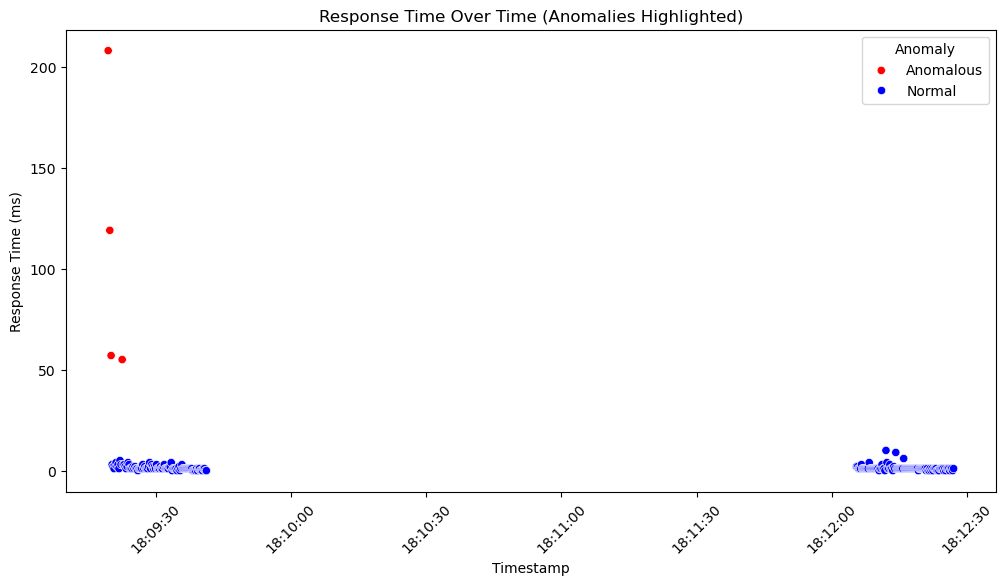

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["timestamp"], y=df["response_time"], hue=df["final_anomaly"], palette={0: "blue", 1: "red"})

plt.title("Response Time Over Time (Anomalies Highlighted)")
plt.xlabel("Timestamp")
plt.ylabel("Response Time (ms)")
plt.xticks(rotation=45)
plt.legend(title="Anomaly", labels=["Anomalous", "Normal"])
plt.show()

In [118]:
# 📌 Save Cleaned Data
df.to_csv("cleaned_data.csv", index=False)